Step 1 Liat Datanya/pahami dulu datanya apa

Step 2 Import Datanya

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#library training model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Training Data dengan dataset train.csv

In [2]:
train = pd.read_csv("train.csv")

Step 3 cek data awalnya bagaimana, head itu 5 data awal

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe() #mengecek jumlah statistik datanya

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.shape #mengecek berapa banyak baris dan kolom

(891, 12)

Cara mengecek feature itu penting ato kaga. Pengaruh feature dengan label.

In [6]:
#Feature Kategorikal
train[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True) #mengecek langsung 2 fitur terhadap survived

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

In [8]:
train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


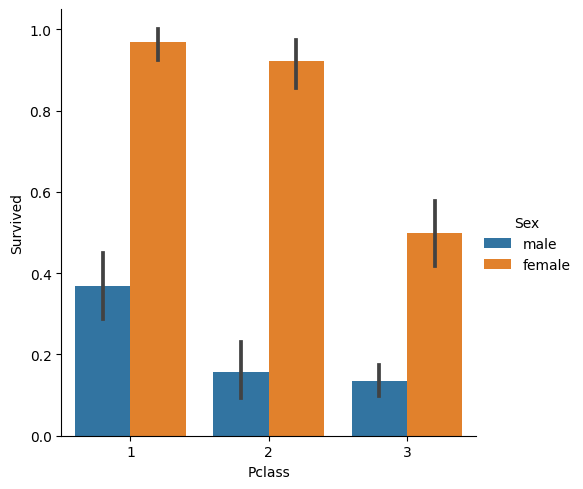

In [9]:
#Bikin visualisasi
sns.catplot(x = 'Pclass', y = 'Survived', hue='Sex', kind = 'bar', data = train)
plt.show()

Dari Grafik diketahui jumlah korban yang selamat dari kapal titanic sesuai dengan tiket kelas (Kelas 1,2,3) 
dimana semakin bawah kelasnya maka peluang selamatnya kecil. Dari data gender penumpang kapal Titanic dengan
jumlah terbanyak yaitu Perempuan.

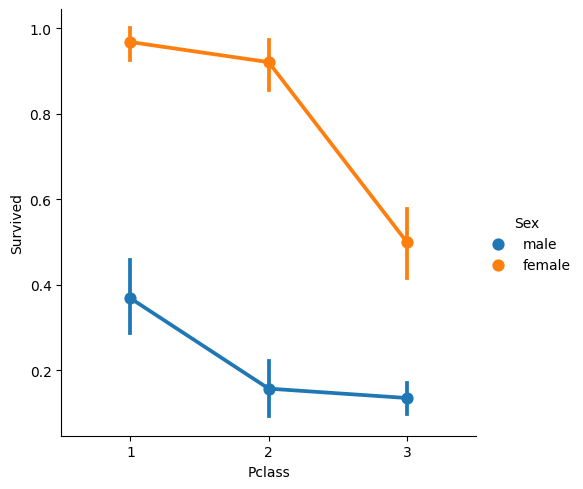

In [10]:
#Grafik titik
sns.catplot(x = 'Pclass', y = 'Survived', hue='Sex', kind = 'point', data = train)
plt.show()

Text(0.5, 1.0, 'Survival Probability by Gender')

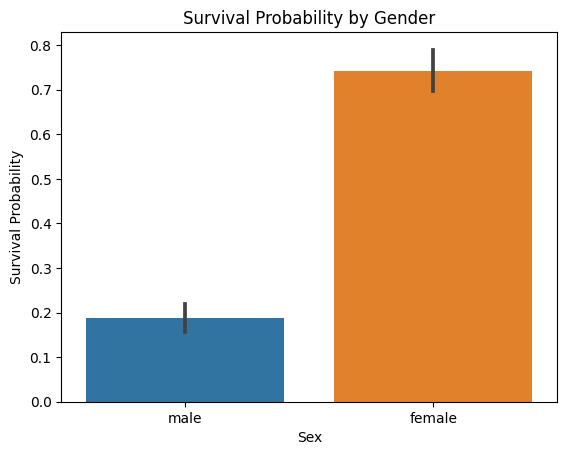

In [11]:
#Satu kategori pake bar plot
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

Text(0.5, 1.0, 'Survival Probability by Gender')

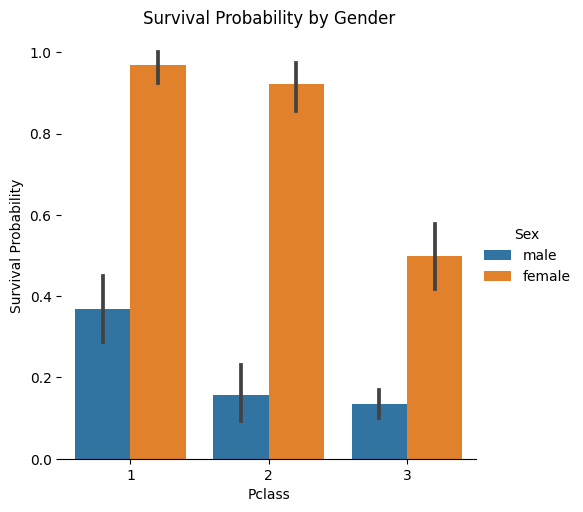

In [12]:
g = sns.catplot(x = 'Pclass', y = 'Survived', hue='Sex', kind = 'bar', data = train)
g.despine(left = True)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

Cek Missing Value

In [13]:
train['Age'].isnull().sum()

177

c:\Python\environments\deep_learning\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Python\environments\deep_learning\lib\site-packages\seaborn\distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


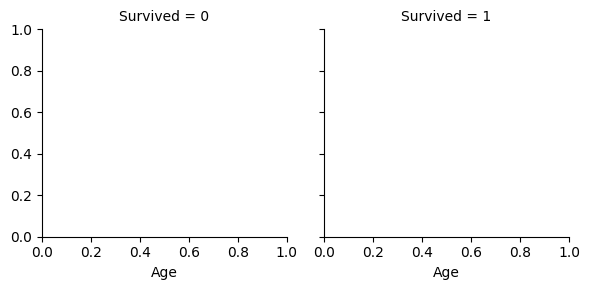

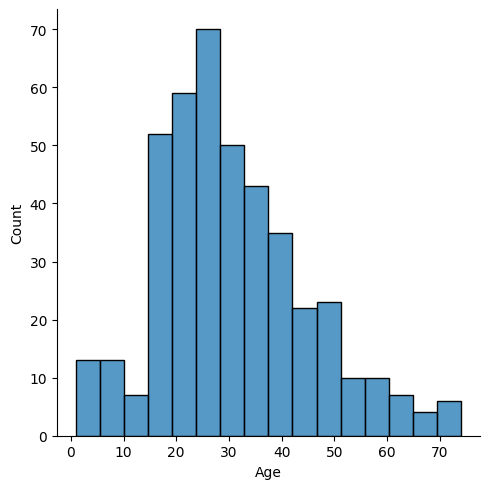

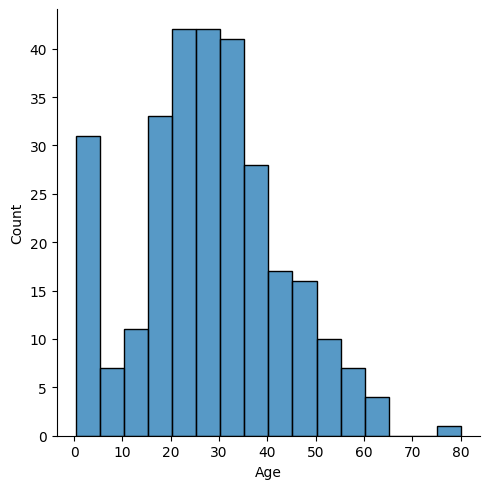

In [14]:
#Bikin Grafik buat Numerik
g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.displot, 'Age')

Mengecek setiap fitur ada hubungan yang terikat atau tidak

<Axes: >

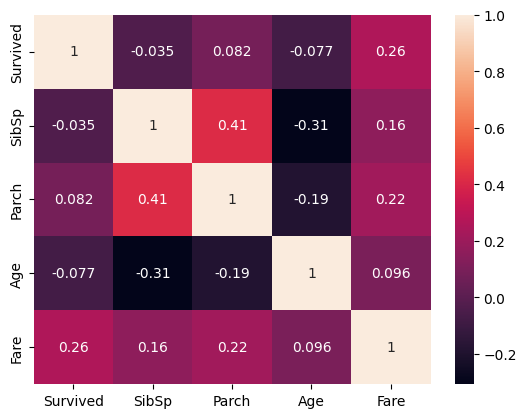

In [15]:
sns.heatmap(train[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)

Lakukan Explanatory Data Analysis untuk memahami data

In [16]:
#Cek Missing Value
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
avgAge = int(train['Age'].mean())
#mengganti missing value untuk data numerik seperti umur/age dengan rata rata
train['Age'].fillna(avgAge, inplace = True)

In [18]:
#Mencari nilai modus
train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [19]:
#Encoding mengubah kategorial menjadi numerikal misal 1 artinya Survived dan 0 artinya mati
train['Sex'].replace(['male','female'],[0,1],inplace = True)

In [20]:
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace = True)

In [21]:
#Membuang fitur yang tidak terpakai/ ga ada pengaruhnya
train.drop(['PassengerId','Name','Age','Fare','Ticket','Cabin'], axis=1, inplace=True)

Split data training dan testing menjadi 70:30

In [22]:
#Buat Model

X_train = X_train.dropna()

y_train = y_train.loc[X_train.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Precision
precision = precision_score(prediction, y_test)
print("Precision:", precision)

#Recall
recall = recall_score(prediction, y_test)
print("Recall:", recall)

Precision: 0.6018518518518519
Recall: 0.7558139534883721


In [32]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(prediction, y_test)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7597751086123179


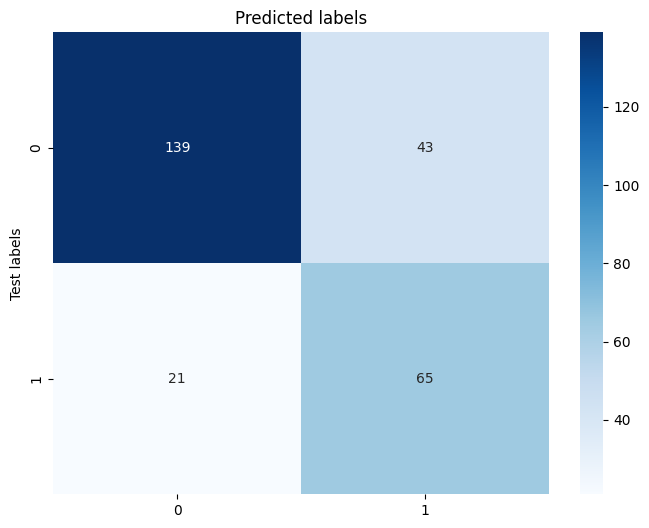

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Confusion Matrix
cm = confusion_matrix(prediction, y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Test labels')
plt.title('Predicted labels')
plt.show()